# INTRODUCTION
There are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

<font color = "red">
Content:
    
1. [Load And Check Data](#1)           
1. [Feature Engineering](#2)
    * [Marriage](#3)
    * [Education](#4)
    * [Sex](#5)
    * [Normalizations](#6)
    * [Age](#7)  
1. [Modeling](#8)
    * [Train - Test Split](#9)
    * [Training Models](#10)
        * [Ada Boost Classifier](#11)           
        * [MLPClassifier](#12)
1. [Conclusion](#13)  

<a id= "1"></a>
# Load And Check Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(30000, 25)

In [10]:
df.drop(columns=["ID"],inplace=True)

<a id= "2"></a>
# Feature Engineering¶



<a id= "3"></a>
## Marriage

In [11]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [12]:
Mar = df["MARRIAGE"].to_numpy().reshape(-1,1)
type(Mar)


numpy.ndarray

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
New_Mar = ohe.fit_transform(Mar).toarray()


In [14]:
print(New_Mar)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [15]:
columns_labels = ["Mar1","Mar2","Mar3","Mar4"]
columns_labels = np.array(columns_labels).ravel()
type(columns_labels)

numpy.ndarray

In [16]:
df_Mar = pd.DataFrame(data=New_Mar, columns = columns_labels)
print(df_Mar)

       Mar1  Mar2  Mar3  Mar4
0       0.0   1.0   0.0   0.0
1       0.0   0.0   1.0   0.0
2       0.0   0.0   1.0   0.0
3       0.0   1.0   0.0   0.0
4       0.0   1.0   0.0   0.0
...     ...   ...   ...   ...
29995   0.0   1.0   0.0   0.0
29996   0.0   0.0   1.0   0.0
29997   0.0   0.0   1.0   0.0
29998   0.0   1.0   0.0   0.0
29999   0.0   1.0   0.0   0.0

[30000 rows x 4 columns]


In [17]:
df= pd.concat([df,df_Mar],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,0.0,1.0,0.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,1.0,0.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,0.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0,0.0,0.0


In [18]:
df.drop(columns=["MARRIAGE"],inplace=True)
df.tail()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4
29995,220000.0,1,3,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0,1.0,0.0,0.0
29996,150000.0,1,3,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,0.0,1.0,0.0
29997,30000.0,1,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.0,0.0,1.0,0.0
29998,80000.0,1,3,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.0,1.0,0.0,0.0
29999,50000.0,1,2,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1,0.0,1.0,0.0,0.0


<a id= "4"></a>
## Education 

In [19]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [20]:
Edu = df["EDUCATION"].to_numpy().reshape(-1,1)
type(Edu)

numpy.ndarray

In [21]:
New_Edu = ohe.fit_transform(Edu).toarray()

In [22]:
columns_labels1 = ["Edu1","Edu2","Edu3","Edu4","Edu5","Edu6","Edu7"]
columns_labels1 = np.array(columns_labels1).ravel()
type(columns_labels1)

numpy.ndarray

In [23]:
df_Edu = pd.DataFrame(data=New_Edu, columns = columns_labels1)
print(df_Edu)

       Edu1  Edu2  Edu3  Edu4  Edu5  Edu6  Edu7
0       0.0   0.0   1.0   0.0   0.0   0.0   0.0
1       0.0   0.0   1.0   0.0   0.0   0.0   0.0
2       0.0   0.0   1.0   0.0   0.0   0.0   0.0
3       0.0   0.0   1.0   0.0   0.0   0.0   0.0
4       0.0   0.0   1.0   0.0   0.0   0.0   0.0
...     ...   ...   ...   ...   ...   ...   ...
29995   0.0   0.0   0.0   1.0   0.0   0.0   0.0
29996   0.0   0.0   0.0   1.0   0.0   0.0   0.0
29997   0.0   0.0   1.0   0.0   0.0   0.0   0.0
29998   0.0   0.0   0.0   1.0   0.0   0.0   0.0
29999   0.0   0.0   1.0   0.0   0.0   0.0   0.0

[30000 rows x 7 columns]


In [24]:
df= pd.concat([df,df_Edu],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7
0,20000.0,2,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,90000.0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,50000.0,2,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,50000.0,1,2,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
df.drop(columns=["EDUCATION"],inplace=True)
df.tail()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7
29995,220000.0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,150000.0,1,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,30000.0,1,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29998,80000.0,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29999,50000.0,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<a id= "5"></a>
## Sex 

In [26]:
df["SEX"].unique()

array([2, 1])

In [27]:
SEX = df["SEX"].to_numpy().reshape(-1,1)
New_SEX = ohe.fit_transform(SEX).toarray()

In [28]:
columns_labels2 = ["Male","Female"]
columns_labels2 = np.array(columns_labels2).ravel()
type(columns_labels2)

numpy.ndarray

In [29]:
df_Sex = pd.DataFrame(data=New_SEX, columns = columns_labels2)
print(df_Sex)

       Male  Female
0       0.0     1.0
1       0.0     1.0
2       0.0     1.0
3       0.0     1.0
4       1.0     0.0
...     ...     ...
29995   1.0     0.0
29996   1.0     0.0
29997   1.0     0.0
29998   1.0     0.0
29999   1.0     0.0

[30000 rows x 2 columns]


In [30]:
df= pd.concat([df,df_Sex],axis=1)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df.drop(columns=["SEX"],inplace=True)
df.tail()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29999,50000.0,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<a id= "6"></a>
## Normalizations
* Bill AMT
* Pay AMT
* LIMIT BAL

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [33]:
Normal = df.loc[:,"BILL_AMT1":"PAY_AMT6"]
Normal

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [34]:
columns=[]
i = 0
for i in range(len(list(Normal.columns))):
     columns.append(list(Normal.columns)[i])
     i+=1

In [35]:
df.drop(columns=columns,inplace=True)

In [36]:
Scaled = scaler.fit_transform(Normal)


In [37]:
columns=[]
i = 0
for i in range(len(list(Normal.columns))):
     columns.append(list(Normal.columns)[i])
     i+=1


In [38]:
df_Normal = pd.DataFrame(data=Scaled, columns = columns)
print(df_Normal)

       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0       0.149982   0.069164   0.086723   0.160138   0.080648   0.260979   
1       0.148892   0.067858   0.087817   0.163220   0.084074   0.263485   
2       0.172392   0.079532   0.093789   0.173637   0.095470   0.272928   
3       0.188100   0.111995   0.113407   0.186809   0.109363   0.283685   
4       0.154144   0.071601   0.106020   0.179863   0.099633   0.275681   
...          ...        ...        ...        ...        ...        ...   
29995   0.313716   0.249208   0.200746   0.243036   0.111622   0.273259   
29996   0.148008   0.067955   0.088267   0.168596   0.085794   0.260979   
29997   0.149674   0.069405   0.087859   0.179805   0.101057   0.275854   
29998   0.145064   0.140604   0.128239   0.209850   0.092403   0.298591   
29999   0.188931   0.112633   0.113667   0.194553   0.112803   0.272746   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      0.000000  0.000409  0.00

In [39]:
df= pd.concat([df,df_Normal],axis=1)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,120000.0,26,-1,2,0,0,0,2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,90000.0,34,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,50000.0,37,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,50000.0,57,-1,0,-1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [40]:
LIMIT_BAL = df["LIMIT_BAL"]
np_LIMIT_BAL=LIMIT_BAL.to_numpy().reshape(-1,1)

In [41]:
Scaled_LB = scaler.fit_transform(np_LIMIT_BAL)

In [42]:
Scaled_LB

array([[0.01010101],
       [0.11111111],
       [0.08080808],
       ...,
       [0.02020202],
       [0.07070707],
       [0.04040404]])

In [43]:
df_LB = pd.DataFrame(data=Scaled_LB, columns =["Scaled_LB"])
df= pd.concat([df,df_LB],axis=1)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Scaled_LB
0,20000.0,24,2,2,-1,-1,-2,-2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.010101
1,120000.0,26,-1,2,0,0,0,2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.111111
2,90000.0,34,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.080808
3,50000.0,37,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.040404
4,50000.0,57,-1,0,-1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.040404


In [44]:
df.drop(columns=["LIMIT_BAL"],inplace=True)

<a id= "7"></a>
## Age

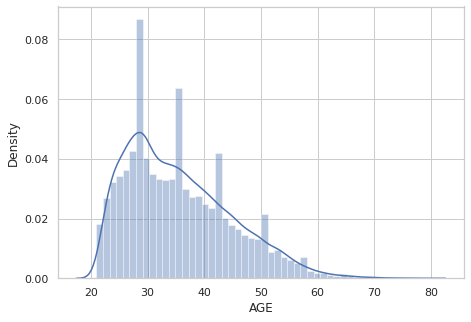

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['AGE'])
plt.show()

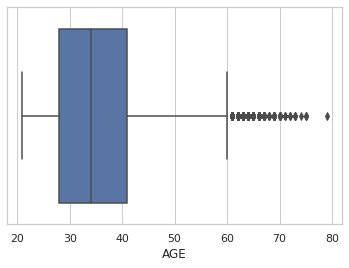

In [46]:
sns.boxplot(df['AGE'])
plt.show()

In [47]:
percentile25 = df['AGE'].quantile(0.25)
percentile75 = df['AGE'].quantile(0.75)
iqr = percentile75-percentile25

In [48]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"UpperLimmit = {upper_limit}","&&&&&", f"LowerLimit = {lower_limit}")

UpperLimmit = 60.5 &&&&& LowerLimit = 8.5


In [49]:
df[df['AGE'] > upper_limit]


,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Scaled_LB
102,63,0,0,0,2,2,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.520001,0.475577,0.349573,0.618947,0.547820,0.622135,0.018405,0.033067,0.018972,0.000000,0.042201,0.045776,0.474747
246,75,0,-1,-1,-1,-1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.193307,0.067768,0.087188,0.161089,0.086173,0.261589,0.001867,0.000912,0.001127,0.008973,0.001862,0.002240,0.242424
366,61,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.188256,0.113099,0.114058,0.182104,0.103624,0.280017,0.003434,0.001328,0.001088,0.001610,0.004689,0.001965,0.040404
387,73,-1,0,0,2,2,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.202394,0.128506,0.124160,0.226685,0.152904,0.318629,0.004007,0.002571,0.003906,0.005636,0.008206,0.009647,0.070707
1029,67,2,2,0,0,2,2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.173397,0.093778,0.101573,0.187925,0.110518,0.281616,0.000000,0.000891,0.002435,0.001932,0.000000,0.004354,0.020202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,73,-2,-2,-2,-2,-2,-2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.146519,0.066220,0.086345,0.160138,0.080648,0.260979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353535
29171,61,0,0,0,2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.312055,0.238690,0.192257,0.331392,0.257324,0.432427,0.009730,0.010093,0.000000,0.010480,0.117225,0.013241,0.505051
29173,64,-2,-2,-2,-2,-1,-1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.146519,0.070871,0.086345,0.160138,0.086241,0.260979,0.005609,0.000000,0.000000,0.009082,0.000000,0.000000,0.353535
29175,74,0,0,0,-1,-1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.216603,0.132060,0.122687,0.176062,0.080648,0.276186,0.004331,0.001347,0.018866,0.000000,0.046395,0.050016,0.151515


In [50]:
df[df['AGE'] < lower_limit]

,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Mar1,Mar2,Mar3,Mar4,Edu1,Edu2,Edu3,Edu4,Edu5,Edu6,Edu7,Male,Female,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Scaled_LB


In [51]:
new_df = df[df['AGE'] < upper_limit]
new_df.shape

(29728, 34)

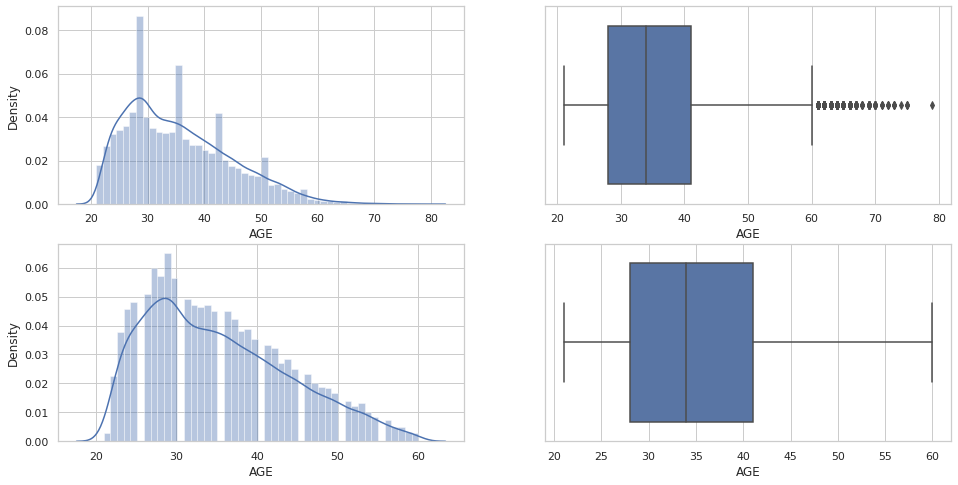

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['AGE'])
plt.subplot(2,2,2)
sns.boxplot(df['AGE'])
plt.subplot(2,2,3)
sns.distplot(new_df['AGE'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AGE'])
plt.show()

<a id= "8"></a>
# Modeling

<a id= "9"></a>
## Train-Test-Split

In [53]:
X = new_df.drop(columns="default.payment.next.month",axis=1)
Y = new_df["default.payment.next.month"]

In [54]:
Y.unique()

array([1, 0])

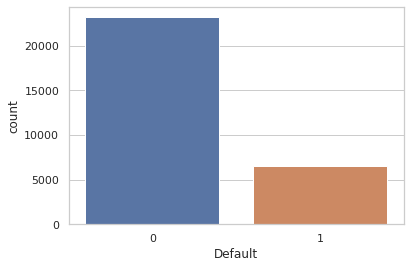

In [55]:
sns.countplot(x=Y)
plt.xlabel("Default")
plt.show()

Lest check is imbalance or not ?

In [56]:
Y_1 = pd.DataFrame(Y[Y == 1])
Y_0 = pd.DataFrame(Y[Y == 0])

In [57]:
a =int(len(Y_1))
b =int(len(Y_0))


In [58]:
print("{:.2f}%".format(a/b * 100))

28.33%


it's a good rate so we can not say that it is imbalance data set.

In [59]:
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [60]:
print(f"X Train:{X_train.shape}")
print(f"X Test:{X_test.shape}")
print(f"Y Test:{y_test.shape}")
print(f"Y Train:{y_train.shape}")

X Train:(19917, 33)
X Test:(9811, 33)
Y Test:(9811,)
Y Train:(19917,)


<a id= "10"></a>
##  Training Models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [62]:
rs=42
models = {
    "LogisticRegression"   :LogisticRegression(random_state=rs),
    "KNeighborsClassifier" :KNeighborsClassifier(n_neighbors= 3,weights= "uniform" ,metric="euclidean"),
    "DecisionTreeClassifier":DecisionTreeClassifier(min_samples_split = 20,max_depth=20,random_state=rs),
    "SVC":SVC(),
    "linearSVC":LinearSVC(),
    "MLPClassifier":MLPClassifier(),
    "RandomForestClassifier":RandomForestClassifier(max_features= 10,min_samples_split=10,min_samples_leaf=10,bootstrap=[False],criterion="gini",random_state=rs),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GaussianNB":  GaussianNB()
}

In [63]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + " trained.")

LogisticRegression trained.
KNeighborsClassifier trained.
DecisionTreeClassifier trained.
SVC trained.
linearSVC trained.
MLPClassifier trained.
RandomForestClassifier trained.
AdaBoostClassifier trained.
GaussianNB trained.


In [64]:
results =[]
    
for name,model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+": {:.2f}%".format(result*100))

LogisticRegression: 80.57%
KNeighborsClassifier: 77.48%
DecisionTreeClassifier: 75.89%
SVC: 79.33%
linearSVC: 78.34%
MLPClassifier: 81.62%
RandomForestClassifier: 81.52%
AdaBoostClassifier: 81.54%
GaussianNB: 30.83%


Ada Boost Classifier and MLPClassifier have the highest scores.

<a id= "11"></a>
### Ada Boost Classifier 

In [65]:
clf = AdaBoostClassifier() 
clf.fit(X_train,y_train)
y_pred_ABC = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)[:, 1]


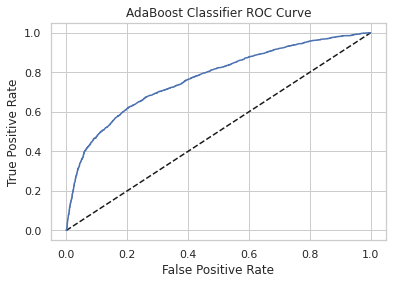

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC Curve')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_probs)

0.7693647053905233

In [68]:
AdaBoostClassifier_cm = confusion_matrix(y_test,y_pred_ABC)
print(AdaBoostClassifier_cm)

[[7287  324]
 [1487  713]]


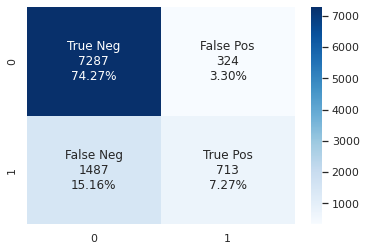

In [69]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                AdaBoostClassifier_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     AdaBoostClassifier_cm.flatten()/np.sum(AdaBoostClassifier_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(AdaBoostClassifier_cm, annot=labels, fmt="", cmap='Blues')
plt.show()

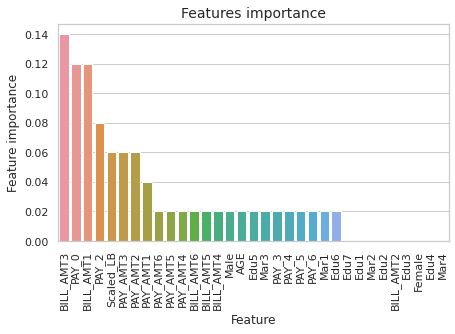

In [70]:
tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [71]:
print(classification_report(y_test,y_pred_ABC))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7611
           1       0.69      0.32      0.44      2200

    accuracy                           0.82      9811
   macro avg       0.76      0.64      0.67      9811
weighted avg       0.80      0.82      0.79      9811



<a id= "12"></a>
### MLPClassifier

In [72]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_probs1 = mlp.predict_proba(X_test)[:, 1]


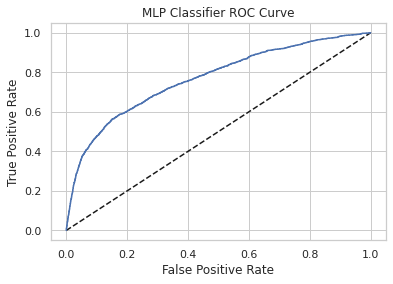

In [73]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_probs1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier ROC Curve')
plt.show()

In [74]:
roc_auc_score(y_test, y_pred_probs1)

0.7674562236475915

In [75]:
MLPClassifier_cm = confusion_matrix(y_test,y_pred_mlp)
print(MLPClassifier_cm)

[[7148  463]
 [1328  872]]


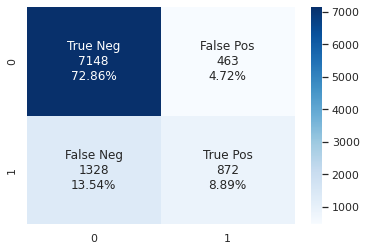

In [76]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                MLPClassifier_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     MLPClassifier_cm.flatten()/np.sum(MLPClassifier_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(MLPClassifier_cm, annot=labels, fmt="", cmap='Blues')
plt.show()

In [77]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7611
           1       0.65      0.40      0.49      2200

    accuracy                           0.82      9811
   macro avg       0.75      0.67      0.69      9811
weighted avg       0.80      0.82      0.80      9811



<a id= "13"></a>
# Conclusion

It can be said that Ada Boost Classification and MLP Classifier are good model in order to predict credit card default.